In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = "https://huggingface.co/datasets/pirocheto/phishing-url/resolve/main/data/train.parquet"
hf_df = pd.read_parquet(url)

In [4]:
hf_df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2,7,0,0,0,0,...,1,1,0,240,8892,67860,0,1,4,legitimate
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2,0,0,0,0,0,...,1,0,1,0,2996,4189860,0,1,2,phishing
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3,0,0,0,0,0,...,1,1,0,30,2527,346022,0,1,3,phishing
3,https://www.bedslide.com,24,16,0,2,0,0,0,0,0,...,0,0,0,139,7531,1059151,0,0,4,legitimate
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3,1,0,0,0,0,...,0,0,0,3002,7590,635,0,1,5,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,https://snip.ly/www.netflix.com-signIn-account...,63,7,0,3,2,0,1,0,0,...,1,0,0,0,2344,13667,0,1,6,phishing
7654,http://webchat.freenode.net/,28,20,0,2,0,0,0,0,0,...,1,0,0,1813,6588,140438,0,0,6,legitimate
7655,http://mr-statucki.com/wp-content/uploads/2009...,67,15,0,2,2,0,0,0,0,...,1,1,0,100,5014,0,0,1,0,phishing
7656,https://www.computerhope.com/jargon/c/cdrom.htm,47,20,0,3,0,0,0,0,0,...,1,1,0,3482,8045,2580,0,0,6,legitimate


In [35]:
hf_df_num_cols = [col for col in hf_df.columns if hf_df.dtypes[col] in ['int64', 'float64']]

In [36]:
hf_correlation_df = hf_df.loc[:, hf_df_num_cols].corr()
hf_correlation_df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
length_url,1.000000,0.203105,0.441985,0.440425,0.407870,0.135555,0.518281,0.593982,NaN,0.637347,...,0.030787,0.116740,-0.011588,0.005911,0.000377,-0.008134,0.077394,0.027493,0.218647,-0.094180
length_hostname,0.203105,1.000000,0.249822,0.384492,0.062978,0.052211,0.160435,0.149143,NaN,0.183880,...,-0.026684,0.220864,0.067720,-0.096957,-0.055114,0.017298,0.163285,-0.019807,0.222325,-0.167228
ip,0.441985,0.249822,1.000000,0.289647,0.116437,0.060144,0.404343,0.382094,NaN,0.442692,...,0.030095,0.136627,0.005742,0.058136,-0.100295,-0.067494,0.170339,0.130228,0.262238,-0.199179
nb_dots,0.440425,0.384492,0.289647,1.000000,0.048261,0.257526,0.351723,0.446713,NaN,0.435791,...,0.038637,0.101615,0.052797,0.073272,-0.024208,-0.004657,0.079707,0.140960,0.197785,-0.087174
nb_hyphens,0.407870,0.062978,0.116437,0.048261,1.000000,0.016003,0.042372,0.135957,NaN,0.122380,...,-0.037656,0.009414,0.025227,-0.066035,0.045176,0.082054,-0.037763,-0.034224,-0.019119,0.104524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
domain_age,-0.008134,0.017298,-0.067494,-0.004657,0.082054,-0.056310,-0.045996,-0.046249,NaN,-0.042194,...,-0.077752,-0.177218,0.059496,-0.278040,0.259282,1.000000,-0.090567,-0.060758,-0.208616,0.586141
web_traffic,0.077394,0.163285,0.170339,0.079707,-0.037763,-0.004994,0.146280,0.175040,NaN,0.194237,...,-0.035442,0.076364,0.073927,0.017459,-0.103920,-0.090567,1.000000,0.001385,0.030494,-0.208926
dns_record,0.027493,-0.019807,0.130228,0.140960,-0.034224,0.039061,0.007180,0.071920,NaN,0.052001,...,-0.001418,0.058739,0.056748,0.217613,-0.058666,-0.060758,0.001385,1.000000,0.094976,-0.140365
google_index,0.218647,0.222325,0.262238,0.197785,-0.019119,0.113485,0.200559,0.122087,NaN,0.163205,...,0.208839,0.258842,-0.147152,0.040122,-0.133257,-0.208616,0.030494,0.094976,1.000000,-0.390376


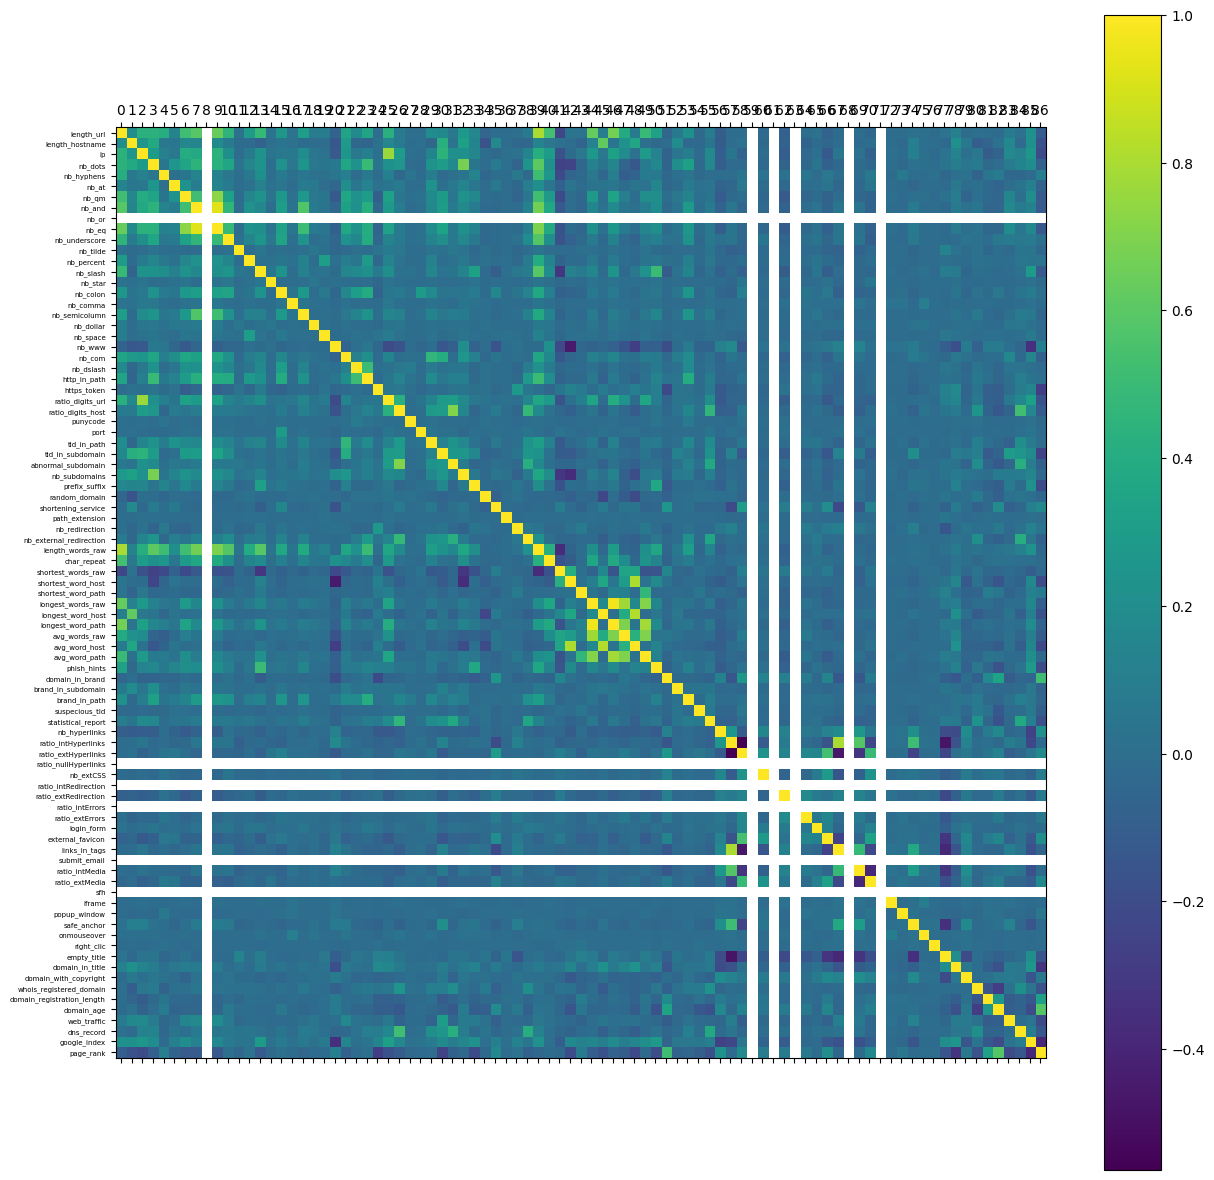

In [69]:
f = plt.figure()

ax = f.add_subplot(111)
cax = ax.matshow(hf_correlation_df)
f.colorbar(cax)
ax.set_xticks(range(len(hf_correlation_df.columns)))
ax.set_yticks(range(len(hf_correlation_df.columns)))
# ax.set_xticklabels(['']+hf_correlation_df.columns, fontsize=5)
ax.set_yticklabels(['']+hf_correlation_df.columns, fontsize=5)

plt.show()

array([[<Axes: title={'center': 'length_url'}>,
        <Axes: title={'center': 'length_hostname'}>,
        <Axes: title={'center': 'ip'}>,
        <Axes: title={'center': 'nb_dots'}>,
        <Axes: title={'center': 'nb_hyphens'}>,
        <Axes: title={'center': 'nb_at'}>,
        <Axes: title={'center': 'nb_qm'}>,
        <Axes: title={'center': 'nb_and'}>,
        <Axes: title={'center': 'nb_or'}>],
       [<Axes: title={'center': 'nb_eq'}>,
        <Axes: title={'center': 'nb_underscore'}>,
        <Axes: title={'center': 'nb_tilde'}>,
        <Axes: title={'center': 'nb_percent'}>,
        <Axes: title={'center': 'nb_slash'}>,
        <Axes: title={'center': 'nb_star'}>,
        <Axes: title={'center': 'nb_colon'}>,
        <Axes: title={'center': 'nb_comma'}>,
        <Axes: title={'center': 'nb_semicolumn'}>],
       [<Axes: title={'center': 'nb_dollar'}>,
        <Axes: title={'center': 'nb_space'}>,
        <Axes: title={'center': 'nb_www'}>,
        <Axes: title={'center': 

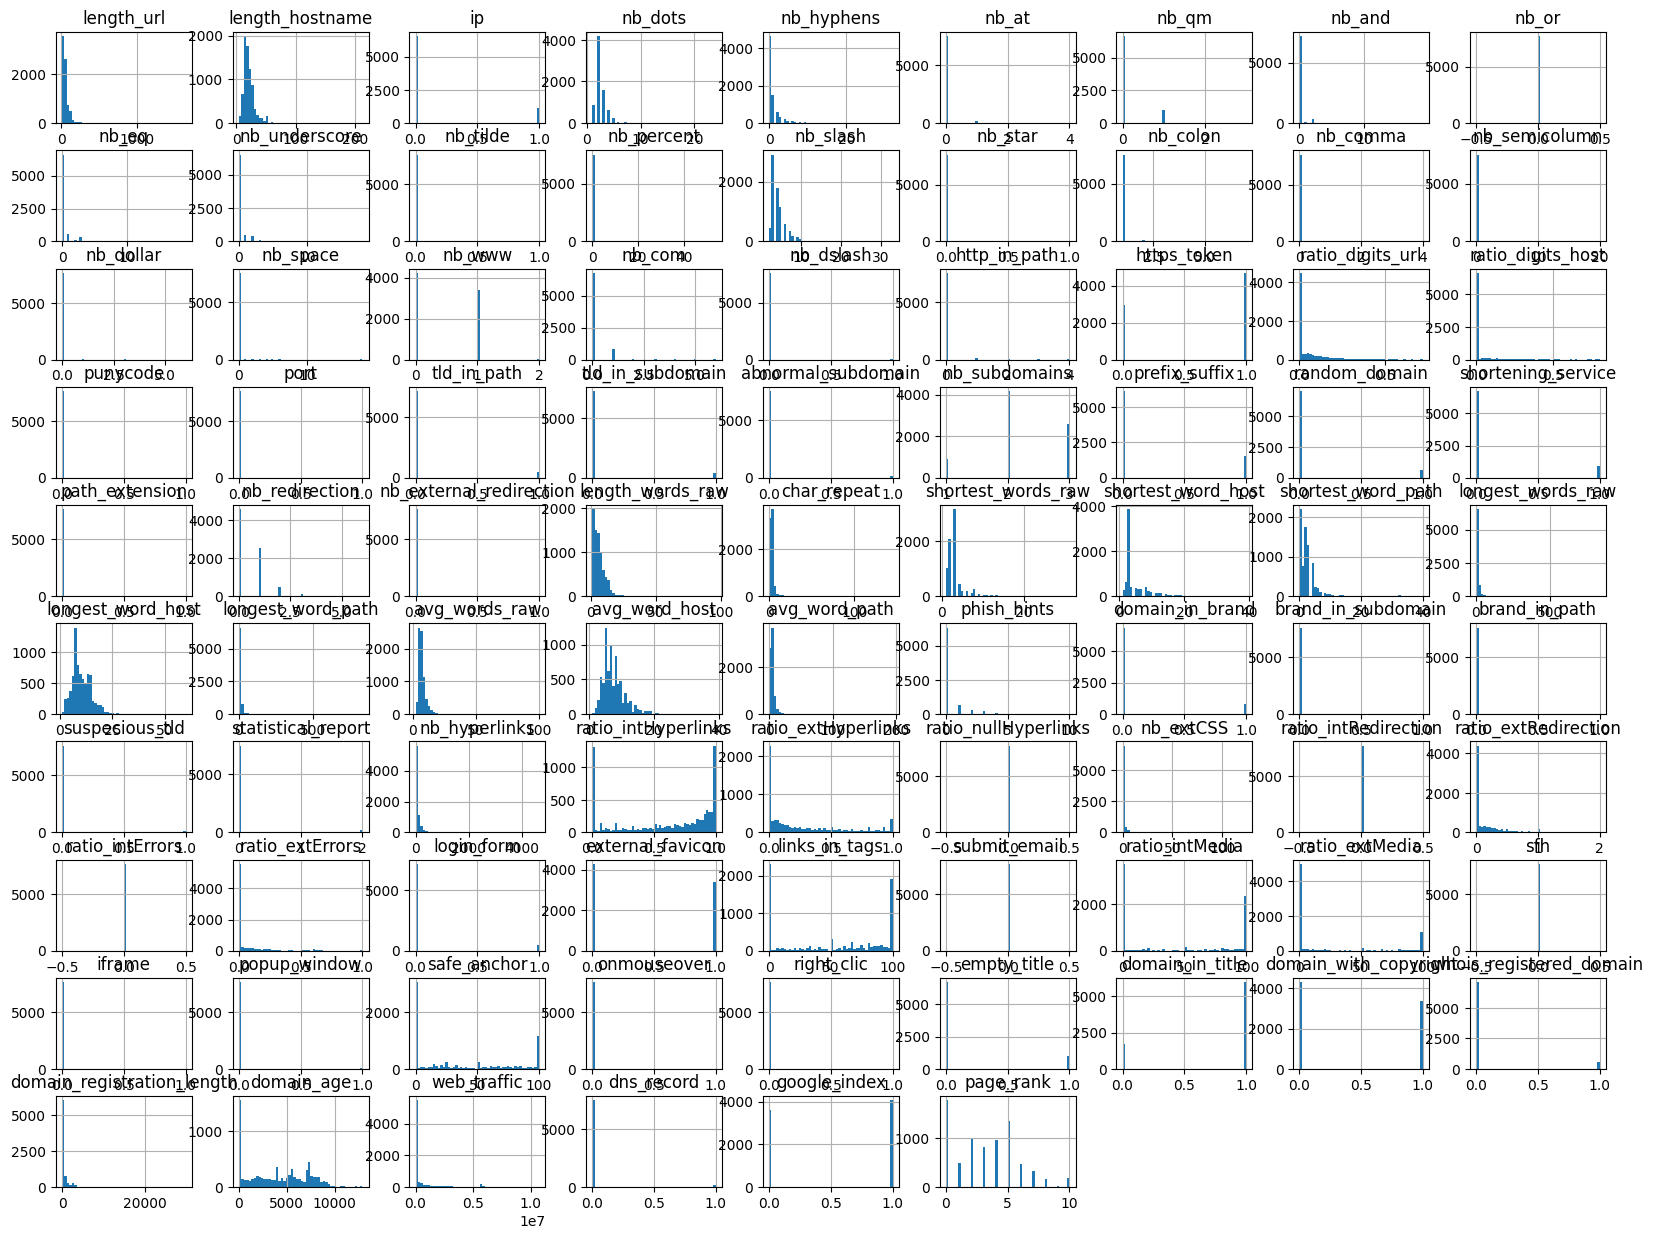

In [38]:
hf_df.hist(bins=50, figsize=(20,15))

In [15]:
uciphishdf = pd.read_csv('/content/drive/MyDrive/Cyber/UCIPhilPhishing/PhiUSIIL_Phishing_URL_Dataset.csv')

In [16]:
uciphishdf

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [39]:
uciphishdf_num_cols = [col for col in uciphishdf.columns if uciphishdf.dtypes[col] in ['int64', 'float64']]

In [40]:
uciphishdf_correlation_df = uciphishdf.loc[:, uciphishdf_num_cols].corr()
uciphishdf_correlation_df

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,...,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,...,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,...,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,...,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,...,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,...,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,...,0.162323,0.062187,0.349530,0.128617,0.034470,0.176119,0.144543,0.050855,0.120841,0.469749
TLDLength,0.033339,0.152669,-0.011125,-0.053915,0.051438,0.386794,0.069818,1.000000,-0.162431,0.000974,...,0.023103,0.017689,-0.043484,-0.029074,-0.004249,-0.024109,-0.046451,-0.014442,-0.026486,-0.079159
NoOfSubDomain,0.071058,0.399157,0.084619,-0.058481,-0.482314,-0.250048,-0.081576,-0.162431,1.000000,0.015902,...,-0.024983,-0.016590,-0.006321,-0.009474,-0.001003,-0.010226,0.003108,0.001702,-0.001538,-0.005955
HasObfuscation,0.161980,0.041643,0.001239,-0.100159,-0.036231,-0.016577,-0.056108,0.000974,0.015902,1.000000,...,-0.009674,-0.002711,-0.014249,-0.012997,-0.002841,-0.015700,-0.016541,-0.004463,-0.013342,-0.052473


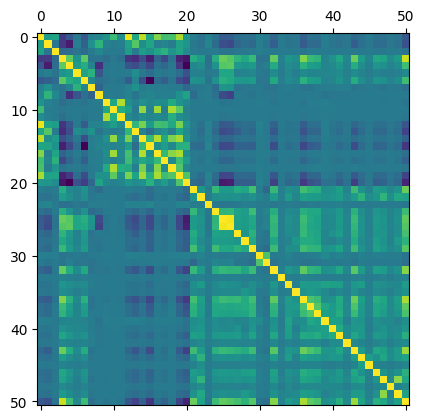

In [41]:
plt.matshow(uciphishdf_correlation_df)

array([[<Axes: title={'center': 'URLLength'}>,
        <Axes: title={'center': 'DomainLength'}>,
        <Axes: title={'center': 'IsDomainIP'}>,
        <Axes: title={'center': 'URLSimilarityIndex'}>,
        <Axes: title={'center': 'CharContinuationRate'}>,
        <Axes: title={'center': 'TLDLegitimateProb'}>,
        <Axes: title={'center': 'URLCharProb'}>],
       [<Axes: title={'center': 'TLDLength'}>,
        <Axes: title={'center': 'NoOfSubDomain'}>,
        <Axes: title={'center': 'HasObfuscation'}>,
        <Axes: title={'center': 'NoOfObfuscatedChar'}>,
        <Axes: title={'center': 'ObfuscationRatio'}>,
        <Axes: title={'center': 'NoOfLettersInURL'}>,
        <Axes: title={'center': 'LetterRatioInURL'}>],
       [<Axes: title={'center': 'NoOfDegitsInURL'}>,
        <Axes: title={'center': 'DegitRatioInURL'}>,
        <Axes: title={'center': 'NoOfEqualsInURL'}>,
        <Axes: title={'center': 'NoOfQMarkInURL'}>,
        <Axes: title={'center': 'NoOfAmpersandInURL'}>,


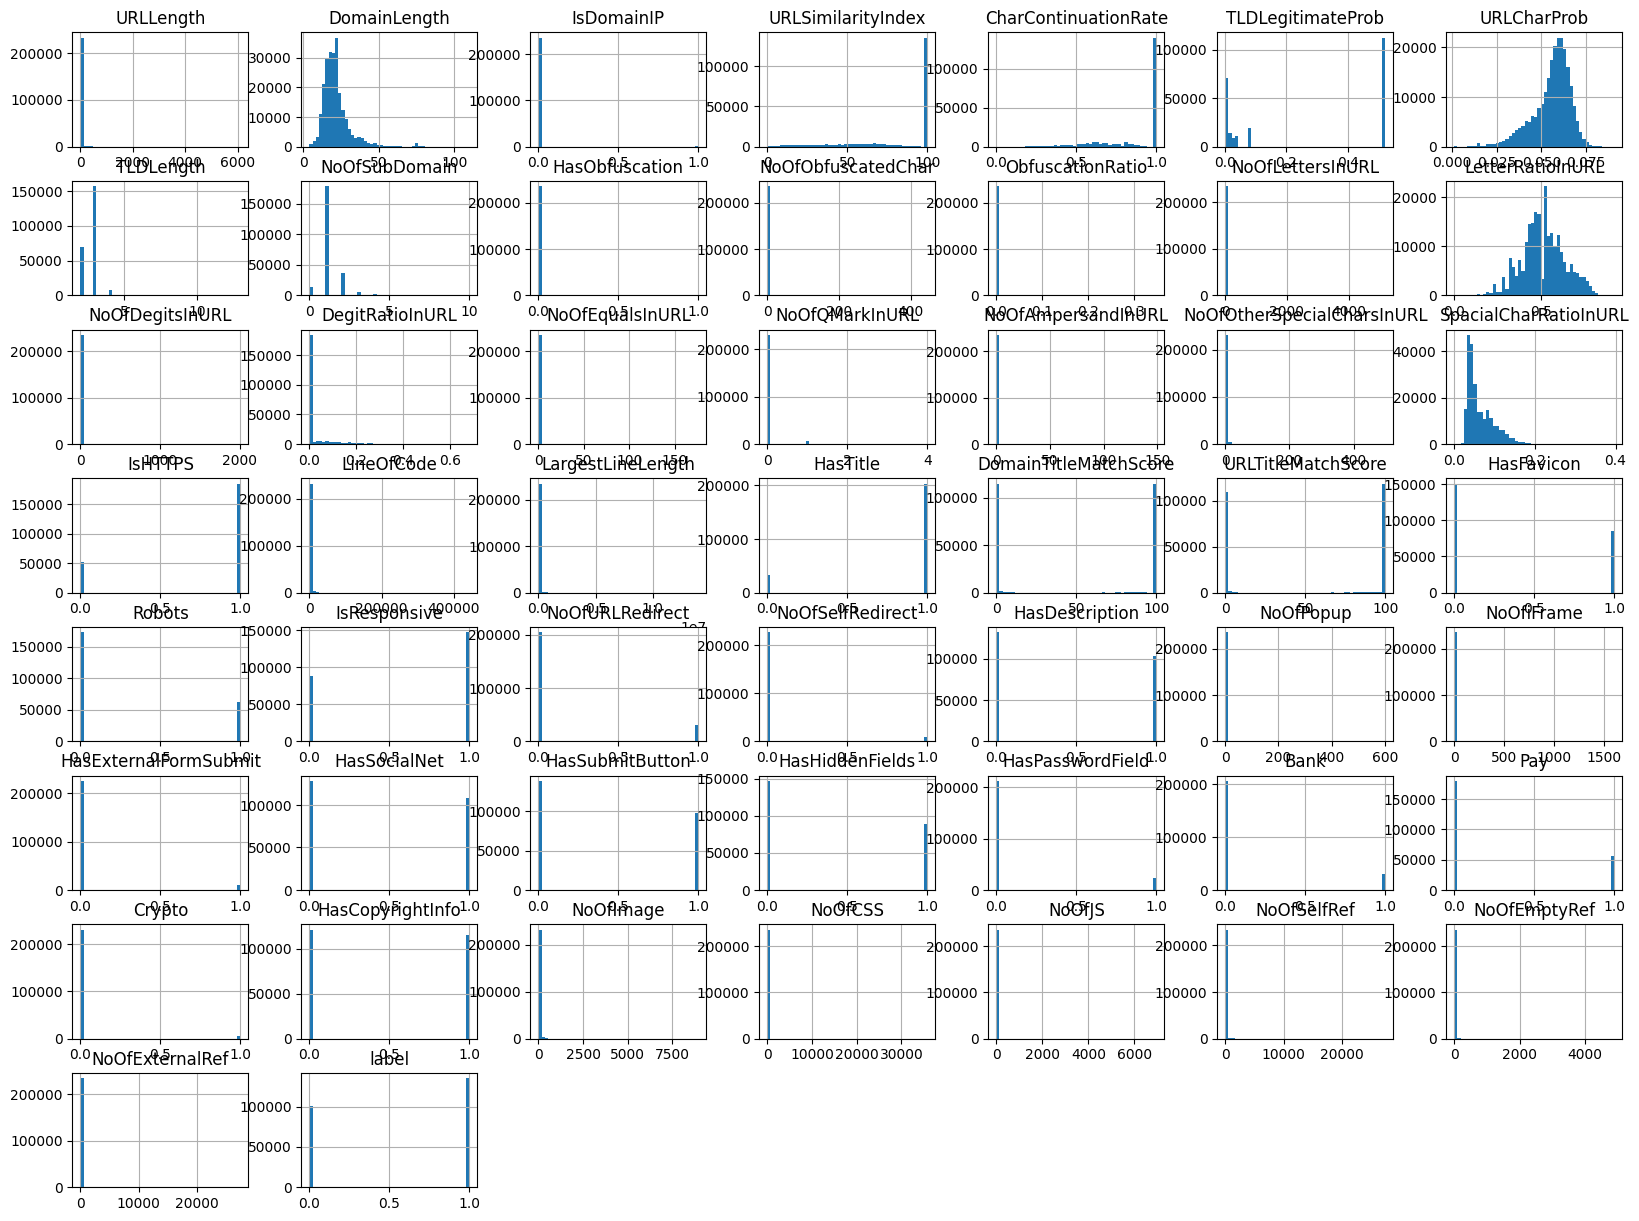

In [42]:
uciphishdf.hist(bins=50, figsize=(20,15))